# Sprint 2: Exploratory Data Analysis (EDA)

## Introduction


This study uses various datasets from instacart, a grocery delivery service. The goal of this project is to use the given data sets to understand more about the habits of shoppers that are using the paltform.

This will be done using the following steps:
1) Cleaning up the data by removing duplicate rows and replacing missing values from all given data frames.

2) Answering various questions about shopping patterns during the days and hours of the week.

3) Answering various questions pertaining to the popularity of specific products.')

In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
#read orders
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
#check that the file uploaded properly
display(orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [3]:
#read products
products = pd.read_csv('/datasets/products.csv', sep = ';')
#check that the file uploaded properly
display(products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [4]:
#read departments
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
#check that the file uploaded properly
display(departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
#read aisles
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
#check that the file uploaded properly
display(aisles)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [6]:
#read order_products
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
#check that the file uploaded properly
display(order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Find and Remove Duplicate Values

### `orders` data frame

In [7]:
#call info on orders data frame to get an overall view of the data
print(orders.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None



In [8]:
# Check for duplicated orders
orders_duplicated = orders.duplicated().sum()
print(f"There are {orders_duplicated} duplicated orders.")

There are 15 duplicated orders.


In [9]:
# Check for all orders placed Wednesday at 2:00 AM
filtered_orders = orders.query("order_dow == 3 and order_hour_of_day == 2")
print(filtered_orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB
None


In [10]:
# Remove duplicate orders
orders= orders.drop_duplicates().reset_index()

In [11]:
# Double check for duplicate rows
orders_duplicated = orders.duplicated().sum()
print(f"There are {orders_duplicated} duplicated orders.")

There are 0 duplicated orders.


In [12]:
# Double check for duplicate order IDs only
orders_id_duplicated = orders['order_id'].duplicated().sum()
print(f"There are {orders_id_duplicated} duplicated order IDs.")

There are 0 duplicated order IDs.


### `products` data frame

In [13]:
#call info on products data frame to get an overall view of the data
print(products.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None



In [14]:
# Check for fully duplicate rows
products_duplicated = products.duplicated().sum()
print(f"There are {products_duplicated} duplicated orders.")

There are 0 duplicated orders.


In [15]:
# Check for just duplicate product IDs
product_id_duplicated = products['product_id'].duplicated().sum()
print(f"There are {product_id_duplicated} duplicated order IDs.")

There are 0 duplicated order IDs.


In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] =products['product_name'].str.lower()
products_lower = products['product_name'].duplicated().sum()
print(f"There are {products_lower} duplicated product names.")

There are 1361 duplicated product names.


In [17]:
# Check for duplicate product names that aren't missing
print(products['product_name'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object>


### `departments` data frame

In [18]:
#call info on departments data frame to get an overall view of the data
print(departments.info())
print()
print(departments.head(5))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol



In [19]:
#check for entire duplicate rows
departments_duplicated = departments.duplicated().sum()
print(f"There are {departments_duplicated} duplicated rows in the departments data frame.")

There are 0 duplicated rows in the departments data frame.


In [20]:
#check for duplicates after the department has been put in lower cased(eliminate sneaky duplicates)
departments['department'] =departments['department'].str.lower()
departments_unique = departments['department'].nunique()
print(f"There are {departments_unique} unique departments in this data frame.")
print()
departments_duplicated = departments.duplicated().sum()
print(f"There are {departments_duplicated} duplicated rows in this data frame.")

There are 21 unique departments in this data frame.

There are 0 duplicated rows in this data frame.


No duplicates found using nunique() to count the number of unique values further supports this. The number of unique departments matches the number of row entries. The sum of duplicated rows is also found to be zero.

### `aisles` data frame

In [21]:
#call info on orders data frame to get an overall view of the data
print(aisles.info())
print()
print(aisles.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [22]:
#check for entire duplicate rows
aisles_duplicated = aisles.duplicated().sum()
print(f"There are {aisles_duplicated} duplicated aisles in the aisles data frame.")

There are 0 duplicated aisles in the aisles data frame.


In [23]:
#check for duplicates after the aisle has been put in lower cased(eliminate sneaky duplicates)
aisles['aisle'] =aisles['aisle'].str.lower()
aisles_unique = aisles['aisle'].nunique()
print(f"There are {aisles_unique} unique aisles in this data frame.")
print()
aisles_duplicated = aisles.duplicated().sum()
print(f"There are {aisles_duplicated} duplicated aisles in this data frame.")

There are 134 unique aisles in this data frame.

There are 0 duplicated aisles in this data frame.


No duplicates found. using nunique() to count the number of unique values further supports this. The number of unique aisles matches the number of row entries. the sum of duplicated rows is also found to be zero.

### `order_products` data frame

In [24]:
#call info on order_products data frame to get an overall view of the data
print(order_products.info())
print()
print(order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [25]:
# Check for fully duplicate rows
order_products_duplicated = order_products.duplicated().sum()
print(f"There are {order_products_duplicated} duplicated rows in this data frame.")

There are 0 duplicated rows in this data frame.


In [53]:
# Double check for any other tricky duplicates
#check for sneaky duplicates
order_products_unique = order_products['order_id'].nunique()
print(f"There are {order_products_unique} unique order_id values in this data frame. Because the number of unique IDs is the same\nas the number of unique rows, it shows that there are no duplicate rows present.")
#drop all orders that do not have unique order ids
print()
print(order_products.info())

There are 450046 unique order_id values in this data frame. Because the number of unique IDs is the same
as the number of unique rows, it shows that there are no duplicate rows present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


In [65]:
display(order_products[order_products.duplicated(subset=['order_id', 'product_id'])])

,order_id,product_id,add_to_cart_order,reordered


This data frame contains no data, meaning no duplicates were found.

## Find and remove missing values


### `products` data frame

In [27]:
#call info to look at which columns (if any) contain missing data points
print(products.info())
print()
print("The product_name column is the only column where there are missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

The product_name column is the only column where there are missing values.


In [28]:
#create a data frame that contains all the rows with missing values
products_missing = products[(products['product_name'].isna())]
display(products_missing)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [29]:
# Are all of the missing product names associated with aisle ID 100?
#use the value counts function on the aisle ID to see if all the rows in the missing products data frame contain the same aisle ID
print(products_missing['aisle_id'].value_counts())
print('As shown here, all of the rows with missing values are associated with aisle_id 100')

100    1258
Name: aisle_id, dtype: int64
As shown here, all of the rows with missing values are associated with aisle_id 100


In [30]:
# Are all of the missing product names associated with department ID 21?
#use the value counts function on the department ID to see if all the rows in the missing products data frame contain the same department ID
print(products_missing['department_id'].value_counts())
print('As shown here, all of the rows with missing values are associated with department_id 21')

21    1258
Name: department_id, dtype: int64
As shown here, all of the rows with missing values are associated with department_id 21


In [31]:
# What is this ailse and department?
#find the aisle
display(aisles)
aisles.loc[99]
print('The aisle is catergorized as missing.')

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


The aisle is catergorized as missing.


In [32]:
#find the department
display(departments)
departments.loc[20]
print('The department is categorized as missing.')

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


The department is categorized as missing.


In [33]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
#double check the number of non null values
print(products.info())
print('There are no found null values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
There are no found null values.


### `orders` data frame

In [34]:
#call info to look at which columns (if any) contain missing data points
print(orders.info())
#days_since_last_prior order is a float type column that is missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   478952 non-null  int64  
 1   order_id                478952 non-null  int64  
 2   user_id                 478952 non-null  int64  
 3   order_number            478952 non-null  int64  
 4   order_dow               478952 non-null  int64  
 5   order_hour_of_day       478952 non-null  int64  
 6   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 25.6 MB
None


In [35]:
#create a data frame that contains all the rows with missing values
orders_missing = orders[(orders['days_since_prior_order'].isna())]
display(orders_missing)

,index,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,28,133707,182261,1,3,10,NaN
96,96,787445,25685,1,6,18,NaN
100,100,294410,111449,1,0,19,NaN
103,103,2869915,123958,1,4,16,NaN
104,104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...,...
478880,478895,2589657,205028,1,0,16,NaN
478881,478896,2222353,141211,1,2,13,NaN
478907,478922,2272807,204154,1,1,15,NaN
478911,478926,2499542,68810,1,4,19,NaN


In [54]:
# Are there any missing values where it's not a customer's first order?
print(orders_missing['order_number'].value_counts())

1    28817
Name: order_number, dtype: int64


No, there are no rows with missing values that are not a customers first order. Therefore it stand to reason that the missing days since prior orders values should be represented by zeros instead.

In [37]:
#replace missing values with zero
orders['days_since_prior_order'].fillna('0', inplace=True)
#double check the number of non null values
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   478952 non-null  int64 
 1   order_id                478952 non-null  int64 
 2   user_id                 478952 non-null  int64 
 3   order_number            478952 non-null  int64 
 4   order_dow               478952 non-null  int64 
 5   order_hour_of_day       478952 non-null  int64 
 6   days_since_prior_order  478952 non-null  object
dtypes: int64(6), object(1)
memory usage: 25.6+ MB
None


### `order_products` data frame

In [38]:
#call info to look at which columns (if any) contain missing data points
print(order_products.info())
#the float column 'add_to_cart_order' is missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [39]:
# What are the min and max values in this column?
#find minimum
add_to_cart_min = order_products['add_to_cart_order'].min()
print(f"The minimum value for the add_to_cart_order is {add_to_cart_min}")
#find maximum
add_to_cart_max = order_products['add_to_cart_order'].max()
print(f"The maximum value for the add_to_cart_order is {add_to_cart_max}")

The minimum value for the add_to_cart_order is 1.0
The maximum value for the add_to_cart_order is 64.0


In [40]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_products_missing = order_products[(order_products['add_to_cart_order'].isna())]
display(orders_products_missing)
print(orders_products_missing.info())

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 737 to 4535739
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           836 non-null    int64  
 1   product_id         836 non-null    int64  
 2   add_to_cart_order  0 non-null      float64
 3   reordered          836 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 32.7 KB
None


In [41]:
# Do all orders with missing values have more than 64 products?
print(orders_products_missing['order_id'].value_counts())

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
2652650     1
2729254     1
2621907     1
888470      1
1677118     1
Name: order_id, Length: 70, dtype: int64


No since each order ID does not repeat and does not contain more than one corresponding product_id.

In [42]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna('999', inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
#double check that missing values are filled in and that the 'add_to_cart_order' column is an integer type
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [43]:
#find min and max for 'order_hour_of_day'
#find minimum
order_hour_of_day_min = orders['order_hour_of_day'].min()
print(f"The minimum value for the order_hour_of_day is {order_hour_of_day_min}")
#find maximum
order_hour_of_day_max = orders['order_hour_of_day'].max()
print(f"The maximum value for the order_hour_of_day is {order_hour_of_day_max}")

The minimum value for the order_hour_of_day is 0
The maximum value for the order_hour_of_day is 23


In [44]:
#find min and max for 'order_dow'#find minimum
order_dow_min = orders['order_dow'].min()
print(f"The minimum value for the order_dow is {order_dow_min}")
#find maximum
order_dow_max = orders['order_dow'].max()
print(f"The maximum value for the order_dow is {order_dow_max}")

The minimum value for the order_dow is 0
The maximum value for the order_dow is 6


### [A2] What time of day do people shop for groceries?

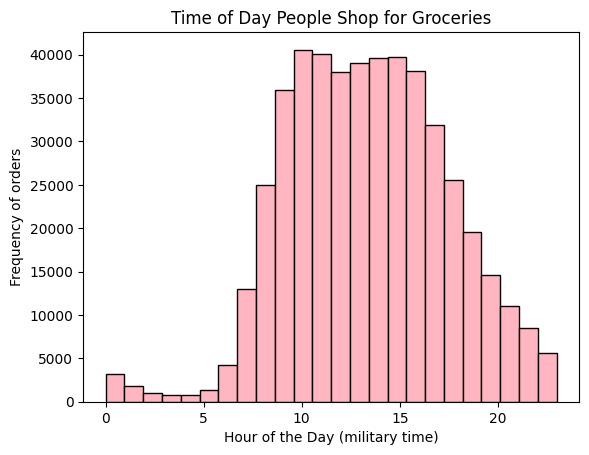

In [75]:
orders['order_hour_of_day'].plot(kind='hist',title = 'Time of Day People Shop for Groceries', color='lightpink', edgecolor='black', bins = 24)
plt.ylabel('Frequency of orders')
plt.xlabel('Hour of the Day (military time)')
plt.show()

According to this graphic, people are most frequently shopping between 10 am and 4 pm, with the highest instances occuring between 10 and 11 am.

### [A3] What day of the week do people shop for groceries?

In [56]:
#since 0-6 represent categories not actual integers, the data type must be changed to object type to get data that makes more sense
orders['order_dow'] = orders['order_dow'].astype('object')
print(orders['order_dow'].describe())

count     478952
unique         7
top            0
freq       84090
Name: order_dow, dtype: int64


Keeping in mind that the numbers for dow correspond with zero as sunday and thus proceeding to Saturday at 6, it appears that shoppers are ordering items most frequently on the 0 day in the list, or Sunday. Sunday occurs 84090 times, representing 17.55% of the total data set.

### [A4] How long do people wait until placing another order?

In [57]:
#since the days_since_prior_order is an object type, it should be converted to an integer to get more descriptive data 
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int)
#confirm that the data type has been changed to an integer
print(orders.info())
print()
print('Description of days_since_prior_order column:')
print(orders['days_since_prior_order'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   478952 non-null  int64 
 1   order_id                478952 non-null  int64 
 2   user_id                 478952 non-null  int64 
 3   order_number            478952 non-null  int64 
 4   order_dow               478952 non-null  object
 5   order_hour_of_day       478952 non-null  int64 
 6   days_since_prior_order  478952 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 25.6+ MB
None

Description of days_since_prior_order column:
count    478952.000000
mean         10.433853
std           9.292153
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


On average, people are waiting ten days before placing their next order. While some are waiting zero days and others are waiting as long as thirty, 75% of people are reordering within 15 days of their previous purchase.

# [B] Medium 

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

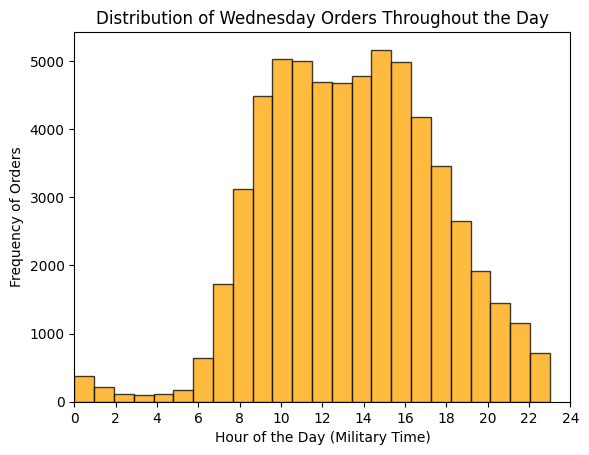

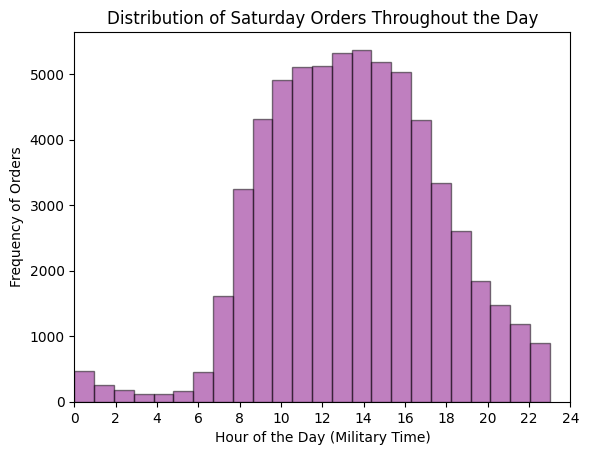

In [58]:
#plot the histogram for wednesday
orders[orders['order_dow']==3]['order_hour_of_day'].plot(kind='hist',xlim=(0,24), title='Distribution of Wednesday Orders Throughout the Day', bins=24, edgecolor='black', color = 'orange', alpha = 0.75)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xlabel('Hour of the Day (Military Time)')
plt.ylabel('Frequency of Orders')
plt.show()
print()
#plot the histogram for saturday
orders[orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist',xlim=(0,24), title='Distribution of Saturday Orders Throughout the Day', bins=24, edgecolor='black', color = 'purple', alpha = 0.5)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xlabel('Hour of the Day (Military Time)')
plt.ylabel('Frequency of Orders')
plt.show()

While both graphs show similar distributions in that more purchases are common in the middle of the day, the peak hours of purchases on Wednesdays are between 10-11 am (10 and 11 hours) and 3-4 pm (15 and 16 hours) with a decrease in purchasing between then. On Saturdays however, purchasing tends to rise in frequency and peak a1 1-2 pm (13 and 14 hours) with a decreasing in purchases as the day goes on.


### [B2] What's the distribution for the number of orders per customer?

,order_number,unique_user_count
0,1,28817
1,2,28633
2,3,28685
3,4,28703
4,5,25661
...,...,...
95,96,220
96,97,221
97,98,191
98,99,169


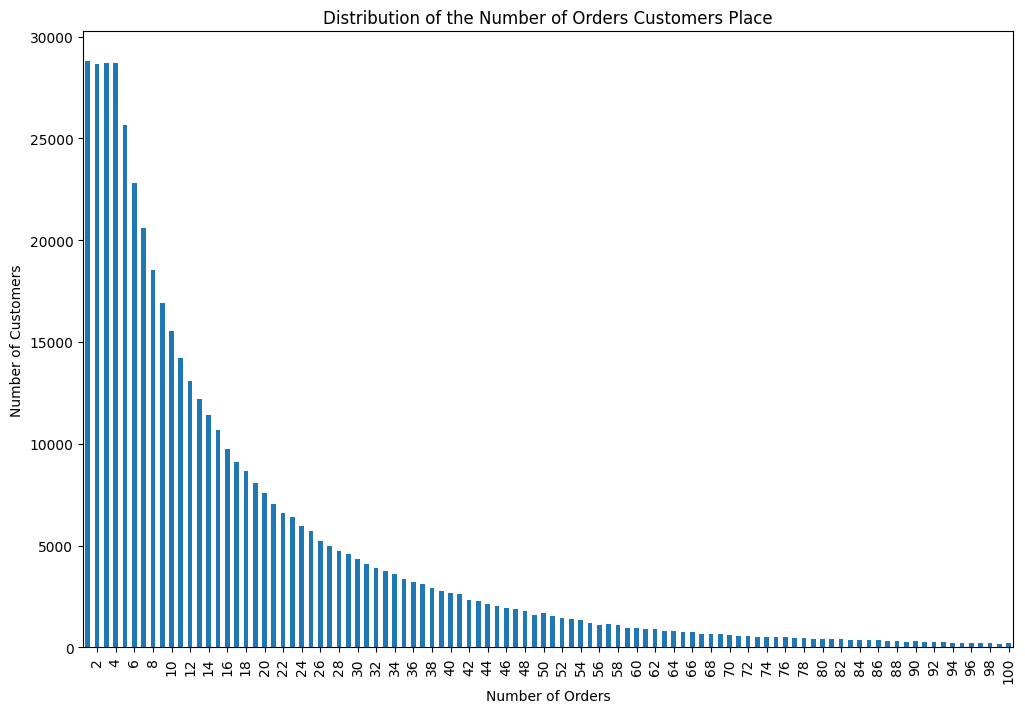

In [59]:
user_count_per_order = orders.groupby('order_number')['user_id'].nunique().reset_index(name='unique_user_count')
display(user_count_per_order)
user_count_per_order.plot(kind = 'bar', legend=False, x = 'order_number', figsize = [12,8], title = 'Distribution of the Number of Orders Customers Place', xlabel = 'Number of Orders', ylabel='Number of Customers')
plt.xticks(ticks=range(min(user_count_per_order['order_number']), max(user_count_per_order['order_number']), 2))
plt.show()

The bar graph shows the distribution of how many customers ordered how many orders. A majority of customers placed between 1-4 orders. As the number of orders increases, the number of customers placing that number of orders decreases.

### [B3] What are the top 20 popular products

In [60]:
#group product ids by how many order ids included it
popular_products = order_products.groupby('product_id')['order_id'].nunique().reset_index(name='unique_product_count')
#sort the product ids by the ones with the highest order id count
popular_products = popular_products.sort_values(by='unique_product_count', ascending=False).reset_index()
# create a new data frame containing just the top 20 products
popular_products = popular_products.head(20)
#merge with products data frame so the product name is included
popular_products_merged = popular_products.merge(products, on ='product_id')
#display the product id and name only
popular_products_final = popular_products_merged[['product_id', 'product_name']]
display(popular_products_final)

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


This data frame shows the twenty most popular products to be purchased in this given data set.

# [C] Hard

### [C1] How many items do people typically buy in one order? What does the distribution look like?

Statistics describing the number of products in each order:


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64

On average, customers buy 10 products per order.


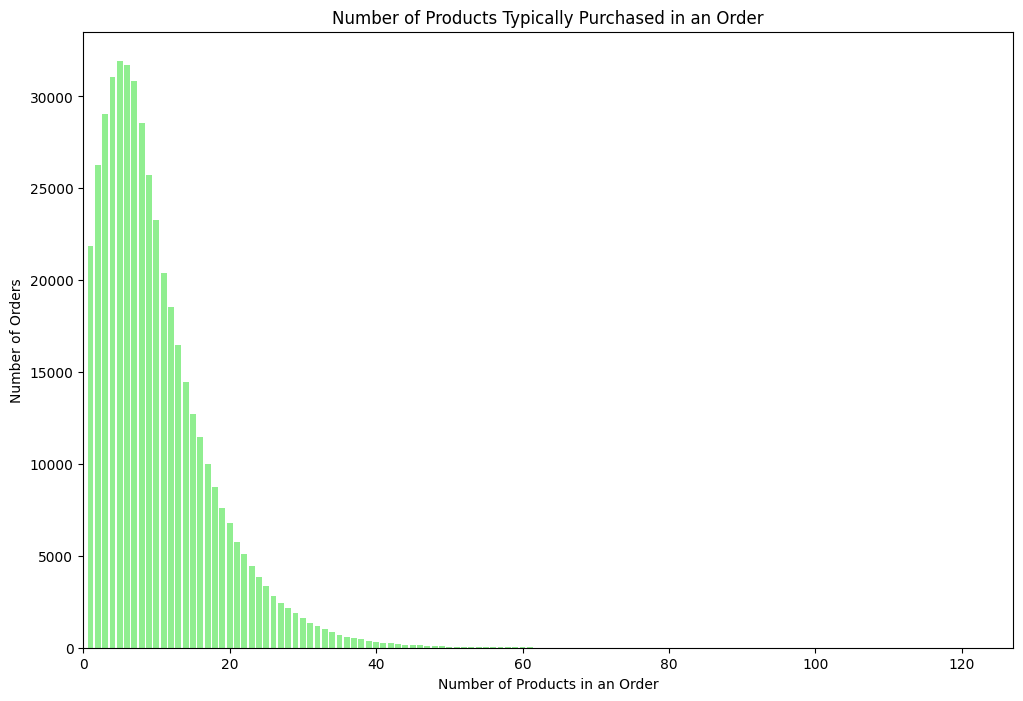

In [61]:
# group by 'order_id' and count the number of products in each order
products_per_order = order_products.groupby('order_id').size()

# Calculate the average number of products per order
average_products_per_order = products_per_order.mean()

# Display the result
print('Statistics describing the number of products in each order:')
display(products_per_order.describe())
print(f"On average, customers buy {average_products_per_order:.0f} products per order.")

# count how many order_ids have each product count
order_count_by_product_count = products_per_order.value_counts().sort_index()

# create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(order_count_by_product_count.index, order_count_by_product_count.values, color='lightgreen')
plt.title('Number of Products Typically Purchased in an Order')
plt.xlabel('Number of Products in an Order')
plt.ylabel('Number of Orders')
plt.xlim(0,127)
plt.show()

This graphic shows the distribution of the number of products typically contained in online orders. Orders most frequently contain 4-7 items.

### [C5] What are the top 20 items that people put in their carts first? 

In [52]:
# creat a data frame containing all products where the add_to_cart_order == 1
first_cart_products = order_products[order_products['add_to_cart_order'] == 1]
# Count the occurrences of each 'product_id' in the 'first_cart_products' df
top_20_products = first_cart_products.groupby('product_id')['order_id'].nunique().reset_index(name='product_count')
#arrange the products in descending order from most commonly occuring to least
top_20_products = top_20_products.sort_values(by='product_count', ascending=False).reset_index()
top_20_products = top_20_products.head(20)
#merge with product information to get item names
top_20_products = top_20_products.merge(products, on ='product_id')
#show results
display(top_20_products)

,index,product_id,product_count,product_name,aisle_id,department_id
0,13414,24852,15562,banana,24,4
1,7127,13176,11026,bag of organic bananas,24,4
2,15028,27845,4363,organic whole milk,84,16
3,11384,21137,3946,organic strawberries,24,4
4,25439,47209,3390,organic hass avocado,24,4
5,11786,21903,3336,organic baby spinach,123,4
6,25732,47766,3044,organic avocado,24,4
7,10622,19660,2336,spring water,115,7
8,9050,16797,2308,strawberries,24,4
9,15102,27966,2024,organic raspberries,123,4



These are the top twenty products that most frequently put in a shopping cart first.


These are the top twenty products that most frequently put in a shopping cart first.


Conclusion: 
Shoppers using instacart are most frequently shopping on Sundays between 10 am and 4 pm. On average, they are waiting approximately ten days before ordering again. On Wednesdays, shoppers are ordering most frequently between 10-11 am and 3-4 pm while on Saturdays they're ordering between 1-2 pm. Most customers place anywhere between 1 and 4 orders using instacart with orders most frequently containing 4-7 items. The top twenty products to be reorders incluse a lot of produce such as bananas, strawberries, avocados, and spinach. All of this information can be useful to understand shopper habits and help future endeavors to make shopping more convenient for the consumer and more profitable for the company.   